# import libraries

In [1]:
import numpy as np # standard library for array processing
import pandas as pd # standard library for deal with csv, excel and dataframe
import nltk # natural langauge processing toolkit for deal with  natural langauge 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re # for string and expression
from sklearn.model_selection import train_test_split # for split data
from sklearn.feature_extraction.text import TfidfVectorizer # convert language to machine understand langauge 
import h2o # machine learning library for auto finding best parameters and machine learning algorithm
from h2o.automl import H2OAutoML 
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_excel('HealthStoryCSVFileContainingAllData.xlsx') # read the data and save in df 
df.head() # display some data

,link,title,description,original_title,rating,reviewers,category,tags,source_link,summary,...,Unnamed: 4401,Unnamed: 4402,Unnamed: 4403,Unnamed: 4404,Unnamed: 4405,Unnamed: 4406,Unnamed: 4407,Unnamed: 4408,Unnamed: 4409,Unnamed: 4410
0,https://www.healthnewsreview.org/review/guardi...,Guardian jumps to conclusions about an Alzheim...,The storyâ€™s headline states: â€œVirtual real...,Virtual reality to help detect early risk of A...,1,"['Matt Shipman', 'Doug Campos-Outcalt, MD, MPA...",The Guardian,"[""alzheimer's disease""]",https://www.theguardian.com/society/2018/dec/1...,{'Our Review Summary': 'The story focuses on a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.healthnewsreview.org/review/in-sto...,"In story on experimental contraceptive gel, Re...",This leaves both investors and lay audiences w...,Evofem's birth control gel meets main study go...,3,"['Jill U. Adams', 'Susan Molchan, MD, MA', 'Jo...",Reuters,['contraceptives'],https://www.reuters.com/article/us-evofem-stud...,{'Our Review Summary': 'Reuters reports on a n...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.healthnewsreview.org/review/using-...,"Using a single patient anecdote, ABC News hail...",Breakthrough? Based on the story of one patien...,How a breakthrough new fertility test is offer...,2,"['Gary Schwitzer', 'Karen Carlson, MD', 'Joy V...",ABC News,['infertility'],https://abcnews.go.com/GMA/Wellness/breakthrou...,{'Our Review Summary': 'ABC News pursues a sto...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.healthnewsreview.org/review/hard-t...,Hard to find the journalism in this brief Reut...,The story mostly just rehashes a drug company ...,J&J says its psoriasis drug superior to Novart...,2,"['Michael Joyce, MD', 'Ishani Ganguli, MD, MPH...",Reuters,['Psoriasis'],https://www.reuters.com/article/us-j-j-drug-ps...,{'Our Review Summary': 'This is a brief news s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.healthnewsreview.org/review/a-litt...,A little more context would have boosted alrea...,Did the study findings really earn a label of ...,Incontinence Drug May Cut Hot Flashes in Brea...,5,"['Sue Rochman', 'Karen Carlson, MD', 'Joy Vict...",HealthDay,"['breast cancer', 'hot flashes']",https://consumer.healthday.com/women-s-health-...,{'Our Review Summary': 'The San Antonio Breast...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# there is a lot of columns so we pick only our target columns
df_ = df[['text','Q6']].copy()

In [4]:
# Drop the empty text column rows
df_.dropna(subset=['text'], inplace=True)

In [5]:
# check the nan values in text
df_['text'].isna().sum()

0

# clean the data 

we define functions for clean the text

In [6]:
# Function for removal url's
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'link', text)

### here are some own define stop words

In [7]:
my_stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", 
                     "across", "act", "actually", "ad", "added", "adj", "ae", "af", "after", "afterwards", "ag", "again", "ah", "aj", "al", "all",
                      "also", "although", "always", "am", "among", "amongst", "amoungst",  "an", "and", "announce", 
                      "ao", "ap", "apparently", "appear",  "appropriate", "to",
                     "approximately", "ar", "are",  "arise", "around", "as", "a's", "aside",  "associated", "at", "au", "auth", "av",  "aw", "away", "ax", "ay", 
                     "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning",
                     "beginnings", "begins", "behind", "being",  "below", "beside", "besides", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", 
                     "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came",  "cc", "cd", "ce", 
                      "cf", "cg", "ch", "ci", "cit", "cj", "cl", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently",
                     "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently",
                     "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did",  "different", "dj",
                     "dk", "dl", "do", "does", "doing", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", 
                     "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "entirely", "eo", "ep", "eq",
                     "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "ey", "f", "f2",
                     "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows",
                     "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", 
                     "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", 
                     "h3", "had", "happens", "hardly", "has",  "have",  "having", "he", "hed", "he'd", "he'll", "hello", "hence", "her", "here", "hereafter", "hereby", "herein", "heres",
                     "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho",  "hopefully", "how", "howbeit", "however", 
                     "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig",  "ih", "ii", "ij",
                     "il", "i'll", "im", "i'm", "in", "inasmuch", "inc", "index", "indicate", "indicated", "indicates", "inner", "insofar", "interest", "into", "invention",
                     "inward", "io", "ip", "iq", "ir", "is",  "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", 
                     "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely",  "lately", "later", "latter", "latterly", "lb", "lc",
                     "le", "les", "lest", "let", "lets", "let's", "lf", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd",
                     "m", "m2", "ma", "made", "mainly", "make", "makes", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "mill", "million", "mine", 
                     "ml", "mn", "mo", "more", "moreover", "move", "mr", "mrs", "ms", "mt", "mu", "mug",  "my", "myself", "n", "n2", "na", "name", "namely", "nay", 
                     "nc", "nd", "ne", "near", "nearly","new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "nos", "noted",  "novel", "now", "nr", "ns",  "ny", "o", "oa", "ob", 
                     "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ol", "old", "om", "omitted", "on", "once", "one", "ones",  "onto", 
                     "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others",  "ou", "ought", "our", "ours", "ourselves",  "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2",
                     "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "pf", "ph", "pi", "pj", "pk", "pl", "placed", 
                      "plus", "pm", "pn", "po", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously",  "promptly", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que",
                      "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily",  "ref", "refs", "regarding",  "related", "relatively", "research-articl", "respectively",
                      "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says",
                     "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", 
                     "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should",  "should've",  "si", "side", "significant",
                     "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone",
                     "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st",
                      "sub", "substantially", "sup", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th",  "that",
                     "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein",
                     "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've",
                     "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", 
                     "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to",  "too", "took", "top", "toward", "towards", "tp", "tq", "tr",  "ts", "t's", "tt", "tv", "twelve", "twenty",
                     "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used",  "uses", "using","ut",
                     "v", "va", "value", "various", "vd", "ve", "ve",  "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was",  "way", "we", 
                     "wed", "we'd",  "went", "were", "we're",  "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter",
                     "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll",
                     "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "with", "within",  "wo",  "words", "world", "would",  "www", "x", "x1", "x2",
                     "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours",
                     "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&','/', '[', ']', '>', '%', '=', '#', '*', '+', 
                '\\', '•',  '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', 
                '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', 
                '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼', 
                '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
                'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', 
                '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
                '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
# for adding multiple words
print(len(my_stopwords))

1092


In [8]:
def clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
       
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    
    tweet = re.sub(r"åÇ", "", tweet)
    
    tweet = re.sub(r"åÀ", "", tweet)
    tweet = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'mentioned', tweet)
    tweet = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'referance', #Replace URLs with 'httpaddr'
                     tweet)
    tweet = re.sub(r'£|\$', 'money', tweet) #Replace money symbols with 'moneysymb'
    tweet = re.sub(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', #Replace phone numbers with 'numbers'
                   ' ', tweet)
    tweet = re.sub(r'\d+(\.\d+)?', ' ', tweet)  #Replace numbers with 'numbr'
    tweet = re.sub(r'[^\w\d\s]', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = re.sub(r'^\s+|\s+?$', '', tweet.lower())
    
    
    # Contractions
   
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"luv", "love", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
   
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
  
   
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
   
    tweet = re.sub(r"e-mail", "email", tweet)
    tweet = re.sub(r"\s{2,}", " ", tweet)
    tweet = re.sub(r"quikly", "quickly", tweet)
    
    
    
    tweet = re.sub(r" iPhone ", " phone ", tweet)
    tweet = re.sub(r"\0rs ", " rs ", tweet) 
    
    tweet = re.sub(r"ios", "operating system", tweet)
    
    tweet = re.sub(r" J K ", " JK ", tweet)
    tweet = re.sub(r"_", " ", tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ') 
        
    
        
        
    return str(tweet)

In [9]:
import string
regular_punct = list(string.punctuation)
#all_punct = list(set(regular_punct+ my_stopwords ))
def remove_punctuation(text,punct_list=regular_punct):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()

In [10]:
def list_to_remove_words_less_then_3(text):
    text = text.split()
    text = " ".join([word for word in text if len(word)>2])
    return text

In [11]:
stop_words = stopwords.words('english')
def nltk_stopword(text, stpwrd=stop_words):
    text = text.split()
    text = " ".join([word.lower() for word in text if not word in stpwrd])
    
    return text

In [12]:
ps = PorterStemmer()
def stemming_func(text):
    text = text.split()
    text = " ".join([ps.stem(word) for word in text])
    
    return text

In [13]:
def ownstopword(text, stpwrd=my_stopwords):
    text = text.split()
    text = " ".join([word.lower() for word in text if not word in stpwrd])
    
    return text

### Apply the functions to clean the text 

In [14]:
df_['text'] = df_['text'].str.lower()# normalized the text by convert to lower case
df_['text'] = df_['text'].map(lambda x: str(x)) # convert to string all the text if there any 
df_['text'] = df_['text'].apply(remove_urls) # remove the urls from the data
df_['text'] = df_['text'].apply(clean) # clean the text remove numbers slangs and many mores
df_['text'] = df_['text'].apply(nltk_stopword) # remove the nltk stopwords which are predefine
df_['text'] = df_['text'].apply(stemming_func) # remove the fisher words it will replace go, going, gone by go same for many
df_['text'] = df_['text'].apply(ownstopword) # remove myown stopwords
df_['text'] = df_['text'].apply(remove_punctuation) # remove the punctutions
df_['text'] = df_['text'].apply(list_to_remove_words_less_then_3) # remove the lenght of words is less then 3

In [15]:
df.Q6.value_counts() # check for q6 columns values

Satisfactory           836
Not Satisfactory       798
Not Applicable           4
556307992904478016       1
453649552034131008       1
470752692759825984       1
362922005034577024       1
1172378557462429952      1
553904009506225984       1
970341728589892992       1
1186078449427010048      1
388687608291020032       1
613520444402962048       1
887673784026759040       1
1091083833812960000      1
976527986202676992       1
608059742586609024       1
1011394464512920064      1
203471008492036000       1
556191753993460992       1
585190125593832960       1
1170849548794759936      1
253480339316563008       1
428014742201192000       1
796733126848498944       1
Name: Q6, dtype: int64

In [16]:
df_ = df[df['Q6'].isin(['Not Satisfactory', 'Satisfactory', 'Not Applicable'])]

In [17]:
df_

,link,title,description,original_title,rating,reviewers,category,tags,source_link,summary,...,Unnamed: 4401,Unnamed: 4402,Unnamed: 4403,Unnamed: 4404,Unnamed: 4405,Unnamed: 4406,Unnamed: 4407,Unnamed: 4408,Unnamed: 4409,Unnamed: 4410
0,https://www.healthnewsreview.org/review/guardi...,Guardian jumps to conclusions about an Alzheim...,The storyâ€™s headline states: â€œVirtual real...,Virtual reality to help detect early risk of A...,1,"['Matt Shipman', 'Doug Campos-Outcalt, MD, MPA...",The Guardian,"[""alzheimer's disease""]",https://www.theguardian.com/society/2018/dec/1...,{'Our Review Summary': 'The story focuses on a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.healthnewsreview.org/review/in-sto...,"In story on experimental contraceptive gel, Re...",This leaves both investors and lay audiences w...,Evofem's birth control gel meets main study go...,3,"['Jill U. Adams', 'Susan Molchan, MD, MA', 'Jo...",Reuters,['contraceptives'],https://www.reuters.com/article/us-evofem-stud...,{'Our Review Summary': 'Reuters reports on a n...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.healthnewsreview.org/review/using-...,"Using a single patient anecdote, ABC News hail...",Breakthrough? Based on the story of one patien...,How a breakthrough new fertility test is offer...,2,"['Gary Schwitzer', 'Karen Carlson, MD', 'Joy V...",ABC News,['infertility'],https://abcnews.go.com/GMA/Wellness/breakthrou...,{'Our Review Summary': 'ABC News pursues a sto...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.healthnewsreview.org/review/hard-t...,Hard to find the journalism in this brief Reut...,The story mostly just rehashes a drug company ...,J&J says its psoriasis drug superior to Novart...,2,"['Michael Joyce, MD', 'Ishani Ganguli, MD, MPH...",Reuters,['Psoriasis'],https://www.reuters.com/article/us-j-j-drug-ps...,{'Our Review Summary': 'This is a brief news s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.healthnewsreview.org/review/a-litt...,A little more context would have boosted alrea...,Did the study findings really earn a label of ...,Incontinence Drug May Cut Hot Flashes in Brea...,5,"['Sue Rochman', 'Karen Carlson, MD', 'Joy Vict...",HealthDay,"['breast cancer', 'hot flashes']",https://consumer.healthday.com/women-s-health-...,{'Our Review Summary': 'The San Antonio Breast...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,https://www.healthnewsreview.org/review/2390/,Radiation from CT scans may raise cancer risks,The story was well done.Â Shortcomings: no in...,Radiation from CT scans may raise cancer risks,3,[],NaN,[],http://www.Reuters.com/article/idUSTRE5BD4VD20...,{'Our Review Summary': 'There is no doubt that...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,https://www.healthnewsreview.org/review/2389/,"More evidence coffee, tea could prevent diabetes",This story gave more context and more caveats ...,"More evidence coffee, tea could prevent diabetes",4,[],NaN,[],http://www.Reuters.com/article/idUSTRE5BD50N20...,"{'Our Review Summary': 'In 400 words, this sto...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1657,https://www.healthnewsreview.org/review/2391/,Diagnosing Breast Cancer: Needle Biopsy Best?,The story seemed to lock in on the impressive-...,Diagnosing Breast Cancer: Needle Biopsy Best?,2,[],NaN,[],http://www.WebMD.com/breast-cancer/news/200912...,{'Our Review Summary': 'This is a newly publis...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1658,https://www.healthnewsreview.org/review/2385/,Artificial retina gives woman limited vision a...,"There were some clear attempts at balance, but...",Artificial retina gives woman limited vision a...,2,[],NaN,[],http://www.CNN.com/2009/HEALTH/12/11/bionic.ey...,{'Our Review Summary': 'The journalistic chall...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

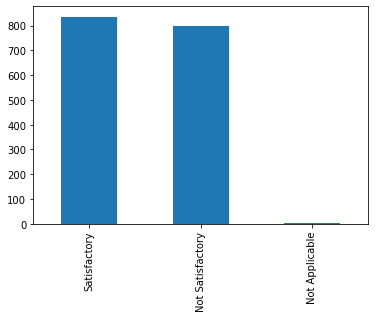

In [18]:
df_.Q6.value_counts().plot(kind='bar')

In [19]:
# one-hot encoding for target column
encoding = {'Not Satisfactory': 0,
            'Not Applicable': 0,
            'Satisfactory': 1,
           }

labels = ['Not Satisfactory', 'Satisfactory']
           

df_['Q6'].replace(encoding, inplace=True)

/home/ushah/.local/lib/python3.8/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
df_.dropna(subset = ["text"], inplace=True)
df_.text.isna().sum()

<ipython-input-27-b0785189f77b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.dropna(subset = ["text"], inplace=True)


0

In [28]:
# Transform each text into a vector of word counts
vectorizer1 = TfidfVectorizer(max_features=1000, max_df = 0.75, 
                             input=df_['text'].all(),
                            ngram_range=(1,2))

training_features = vectorizer1.fit_transform(df_['text']) 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(training_features, df_['Q6'], test_size = 0.15, 
                                                    random_state = 101, stratify=df_.Q6)

# linear_model

In [31]:
from sklearn import linear_model
import sklearn
alpha = [80.0, 90.0, 100.0, 110.0, 120.0] 
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = sklearn.model_selection.cross_val_score(ridge, x_train, y_train, cv=5)#scoring='f1' kaldirdim multiclass hatasina karsilik
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  80.0
[0.57352941 0.69117647 0.64338235 0.62867647 0.61764706]
0.6308823529411766


alpha:  90.0
[0.58088235 0.6875     0.64338235 0.62867647 0.61397059]
0.6308823529411767


alpha:  100.0
[0.57720588 0.67279412 0.65073529 0.64338235 0.59191176]
0.6272058823529412


alpha:  110.0
[0.57720588 0.67279412 0.65073529 0.63970588 0.58823529]
0.6257352941176471


alpha:  120.0
[0.57352941 0.66176471 0.65073529 0.63235294 0.59191176]
0.6220588235294118




# MultinomialNB

In [38]:
# MultinomialNB with bag of word
from sklearn.naive_bayes import MultinomialNB
alpha = [1e-10, 1e-5, 0.1, 1.0, 2.0, 5.0]
for a in alpha:
    mnb = MultinomialNB(a)
    scores = sklearn.model_selection.cross_val_score(mnb, x_train, y_train, cv=5)
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1e-10
[0.58823529 0.63970588 0.63602941 0.59558824 0.58823529]
0.6095588235294118


alpha:  1e-05
[0.58823529 0.63970588 0.63602941 0.59558824 0.58823529]
0.6095588235294118


alpha:  0.1
[0.59191176 0.63970588 0.63970588 0.59558824 0.58823529]
0.6110294117647059


alpha:  1.0
[0.58455882 0.65073529 0.63235294 0.59191176 0.58823529]
0.6095588235294118


alpha:  2.0
[0.59191176 0.63970588 0.62132353 0.60294118 0.58088235]
0.6073529411764705


alpha:  5.0
[0.58088235 0.63970588 0.625      0.60294118 0.58823529]
0.6073529411764707




# DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(x_train,y_train)
preddt = dtclassifier.predict(x_test)
accuracy= accuracy_score(preddt,y_test)
print(accuracy)

0.5850622406639004


In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, preddt))
print(confusion_matrix(y_test, preddt))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       118
           1       0.60      0.56      0.58       123

    accuracy                           0.59       241
   macro avg       0.59      0.59      0.58       241
weighted avg       0.59      0.59      0.58       241

[[72 46]
 [54 69]]


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
ridge = linear_model.RidgeClassifier(110)
y_pred = cross_val_predict(ridge,x_test, y_test, cv=5)
accuracy= accuracy_score(pred,y_test)
print(accuracy)

0.5767634854771784


# SVM

In [41]:
# Perform classification with SVM, kernel=linear
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(x_train, y_train)
prediction_linear = classifier_linear.predict(x_test)
print(classification_report(y_test, prediction_linear))
print(confusion_matrix(y_test, prediction_linear))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       118
           1       0.63      0.63      0.63       123

    accuracy                           0.62       241
   macro avg       0.62      0.62      0.62       241
weighted avg       0.62      0.62      0.62       241

[[72 46]
 [46 77]]


# LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")
log_reg.fit(x_train, y_train)
prediction_linear = log_reg.predict(x_test)
print(classification_report(y_test, prediction_linear))
print(confusion_matrix(y_test, prediction_linear))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       118
           1       0.63      0.63      0.63       123

    accuracy                           0.63       241
   macro avg       0.63      0.63      0.63       241
weighted avg       0.63      0.63      0.63       241

[[73 45]
 [45 78]]


# RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier()
rnf.fit(x_train, y_train)
prediction_linear = rnf.predict(x_test)
print(classification_report(y_test, prediction_linear))
print(confusion_matrix(y_test, prediction_linear))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       118
           1       0.66      0.67      0.66       123

    accuracy                           0.66       241
   macro avg       0.66      0.66      0.66       241
weighted avg       0.66      0.66      0.66       241

[[76 42]
 [41 82]]
